## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.


## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

## Примечания

1. profile_id это номер сессии испытаний. т.е. в датасете несколько испытаний и у них есть айдишник, 1 испытание может идти до 6 часов. каждя запись это показатели через 2 секунды от предыдущей. 
2. Значения в данных это отклонения от эталонных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков. Постройте pairplot**

In [3]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [4]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [5]:
round(df.describe(), 3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000,1330816.000
mean,54.279,36.230,66.343,-25.134,56.879,2202.081,-68.717,37.413,58.507,48.188,24.565,31.106,40.793
std,44.173,21.786,28.672,63.092,22.952,1859.663,64.933,92.182,19.001,19.991,1.930,77.136,25.045
min,-25.291,10.624,18.586,-131.530,18.134,-275.549,-278.004,-293.427,20.857,18.077,8.783,-246.467,2.000
25%,12.070,18.698,42.788,-78.691,38.416,317.111,-115.406,1.096,43.152,31.990,23.185,-0.137,17.000
50%,48.938,26.900,65.110,-7.430,56.036,1999.977,-51.094,15.774,60.266,45.626,24.797,10.860,43.000
75%,90.034,49.857,88.141,1.470,75.587,3760.639,-2.980,100.612,72.008,61.461,26.217,91.597,65.000
max,133.037,101.599,141.363,131.470,111.946,6000.015,0.052,301.708,113.607,101.148,30.714,261.006,81.000


In [6]:
df['profile_id'].unique()

array([17,  5, 12, 32, 21,  2,  4,  7, 19,  3,  9, 23, 27, 26, 11,  6, 10,
       13, 31, 18, 30, 29,  8, 24, 20, 15, 14, 16, 36, 74, 75, 41, 68, 50,
       53, 49, 81, 80, 59, 54, 57, 70, 51, 55, 45, 69, 61, 76, 56, 64, 72,
       73, 62, 65, 63, 43, 47, 66, 42, 48, 67, 44, 79, 52, 60, 46, 58, 78,
       71], dtype=int64)

In [7]:
df['profile_id'].nunique()

69

In [8]:
round(df['motor_speed'].describe(), 3)

count    1330816.000
mean        2202.081
std         1859.663
min         -275.549
25%          317.111
50%         1999.977
75%         3760.639
max         6000.015
Name: motor_speed, dtype: float64

In [9]:
df.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
u_q,1.000000,0.051721,0.050610,0.004702,0.104373,0.683556,-0.100357,-0.124589,0.122365,0.090992,0.150264,-0.136215,-0.030499
coolant,0.051721,1.000000,0.504835,0.195517,0.674974,0.011872,0.074865,-0.256389,0.467117,0.860750,0.525963,-0.257982,0.635797
stator_winding,0.050610,0.504835,1.000000,-0.234950,0.970135,0.432034,-0.624370,0.065617,0.795893,0.860268,0.333208,0.095510,0.340580
u_d,0.004702,0.195517,-0.234950,1.000000,-0.142749,-0.288472,0.448331,-0.723069,-0.172031,-0.008098,0.203647,-0.753779,0.263264
stator_tooth,0.104373,0.674974,0.970135,-0.142749,1.000000,0.398431,-0.487062,-0.042294,0.832084,0.953115,0.443470,-0.018413,0.450821
motor_speed,0.683556,0.011872,0.432034,-0.288472,0.398431,1.000000,-0.700609,-0.068881,0.458947,0.255790,0.118232,-0.043903,-0.028585
i_d,-0.100357,0.074865,-0.624370,0.448331,-0.487062,-0.700609,1.000000,-0.231344,-0.427736,-0.278005,0.016397,-0.274097,0.053524
i_q,-0.124589,-0.256389,0.065617,-0.723069,-0.042294,-0.068881,-0.231344,1.000000,-0.142416,-0.131466,-0.314044,0.996457,-0.324654
pm,0.122365,0.467117,0.795893,-0.172031,0.832084,0.458947,-0.427736,-0.142416,1.000000,0.756684,0.513728,-0.117138,0.386241
stator_yoke,0.090992,0.860750,0.860268,-0.008098,0.953115,0.255790,-0.278005,-0.131466,0.756684,1.000000,0.520382,-0.117118,0.563437


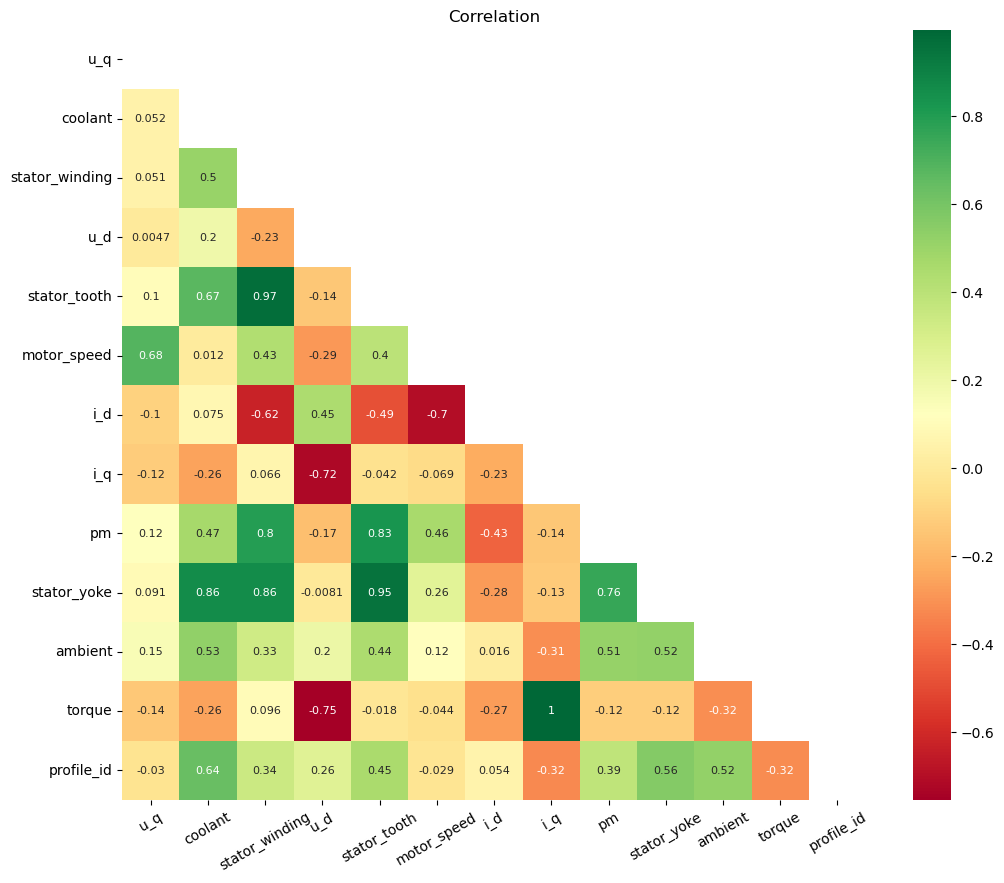

In [10]:
mask = np.triu(df.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot= True, cmap = "RdYlGn", annot_kws = {'size': 8}, mask = mask)
plt.title('Correlation')
plt.xticks(rotation = 30)
plt.show()

In [11]:
df17 = (df[df['profile_id']==17]).copy(deep = True)
round(df17, 4).head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.4507,18.8052,19.0867,-0.3501,18.2932,0.0029,0.0044,0.0003,24.5542,18.3165,19.8507,0.1871,17
1,-0.3257,18.8186,19.0924,-0.3058,18.2948,0.0003,0.0006,-0.0008,24.5381,18.3150,19.8507,0.2454,17
2,-0.4409,18.8288,19.0894,-0.3725,18.2941,0.0024,0.0013,0.0004,24.5447,18.3263,19.8507,0.1766,17
3,-0.3270,18.8356,19.0830,-0.3162,18.2925,0.0061,0.0000,0.0020,24.5540,18.3308,19.8506,0.2383,17
4,-0.4712,18.8570,19.0825,-0.3323,18.2914,0.0031,-0.0643,0.0372,24.5654,18.3267,19.8506,0.2082,17
5,-0.5390,18.9015,19.0771,0.0091,18.2906,0.0096,-0.6136,0.3367,24.5736,18.3239,19.8506,0.4762,17
6,-0.6531,18.9417,19.0746,0.2389,18.2925,0.0013,-1.0056,0.5542,24.5766,18.3219,19.8506,0.6700,17
7,-0.7584,18.9609,19.0825,0.3951,18.2940,0.0014,-1.2884,0.7064,24.5749,18.3147,19.8506,0.7520,17
8,-0.7271,18.9735,19.0855,0.5466,18.2920,0.0006,-1.4905,0.8173,24.5671,18.3069,19.8506,0.9105,17
9,-0.8743,18.9878,19.0760,0.5789,18.2872,-0.0012,-1.6345,0.8980,24.5532,18.3017,19.8506,0.9240,17


In [12]:
df17.drop('profile_id', axis = 1, inplace = True)

In [13]:
df17.corr().style.background_gradient('summer_r')

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
u_q,1.000000,-0.239625,-0.784396,0.966760,-0.700702,0.203129,0.897917,-0.969098,-0.464588,-0.635884,0.416671,-0.968925
coolant,-0.239625,1.000000,0.204825,-0.245829,0.183733,0.002441,-0.237983,0.246189,0.123472,0.170986,-0.076361,0.246063
stator_winding,-0.784396,0.204825,1.000000,-0.836115,0.987628,0.173924,-0.819573,0.826689,0.850041,0.963280,-0.010320,0.827855
u_d,0.966760,-0.245829,-0.836115,1.000000,-0.753740,-0.049241,0.978941,-0.999511,-0.506054,-0.686764,0.397286,-0.999797
stator_tooth,-0.700702,0.183733,0.987628,-0.753740,1.000000,0.194620,-0.737416,0.742230,0.916888,0.991399,0.123749,0.743361
motor_speed,0.203129,0.002441,0.173924,-0.049241,0.194620,1.000000,-0.242610,0.033396,0.182916,0.196263,0.166127,0.038465
i_d,0.897917,-0.237983,-0.819573,0.978941,-0.737416,-0.242610,1.000000,-0.975509,-0.482295,-0.668893,0.387535,-0.977335
i_q,-0.969098,0.246189,0.826689,-0.999511,0.742230,0.033396,-0.975509,1.000000,0.491600,0.674204,-0.410845,0.999784
pm,-0.464588,0.123472,0.850041,-0.506054,0.916888,0.182916,-0.482295,0.491600,1.000000,0.947211,0.422252,0.492173
stator_yoke,-0.635884,0.170986,0.963280,-0.686764,0.991399,0.196263,-0.668893,0.674204,0.947211,1.000000,0.212657,0.675194


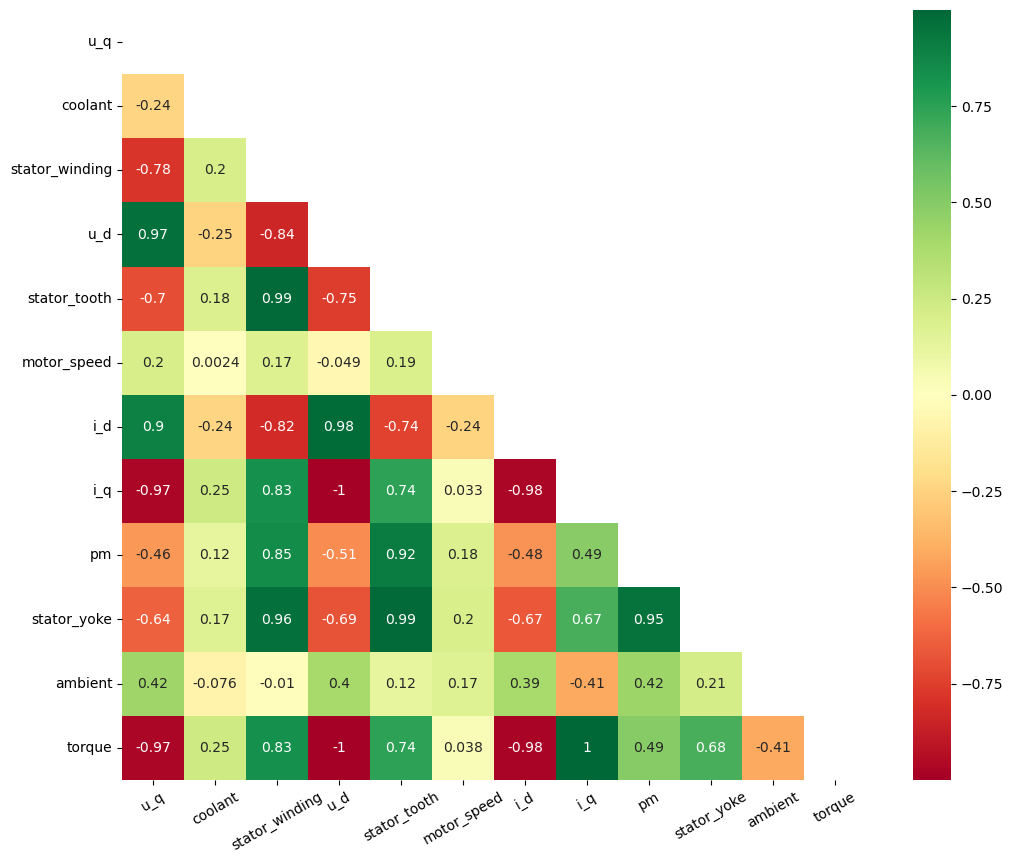

In [14]:
mask17 = np.triu(df17.corr())
plt.figure(figsize = (12,10))
sns.heatmap(df17.corr(), annot = True, cmap = "RdYlGn", mask = mask17)
plt.xticks(rotation = 30)
plt.show()

_Как видно из корреляционного графика, все температуры имеют очень сильную зависимость, части статора нагреваются_

_равномерно, за ними следует ротор, температура которого тоже поднимается с ростом нагрева статора_

In [15]:
round(df17['stator_tooth'],0).unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59.])

In [16]:
round(df17['stator_winding'], 0).unique()

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72.])

In [17]:
X17 = df17.drop('motor_speed', axis = 1)
y17 = df17['motor_speed']

Если строка в 2 секунды, то данный сеанс (17) длился чуть меньше 9 часов

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [18]:
X = df.drop('motor_speed', axis = 1)
y = df['motor_speed']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
pred = lr.predict(X_train)
pred

array([  10.25199404, 4967.68829707, 1765.84344935, ..., 1921.60457494,
       2511.74701806, -287.64964883])

In [32]:
y_train

356893     249.986893
938265    5807.261835
473591    1499.980469
803032    2090.961533
51042     1999.977661
             ...     
359783     249.997833
152315     499.995819
963395    1096.309584
117952    1999.979004
305711      -0.004758
Name: motor_speed, Length: 931571, dtype: float64

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**